In [15]:
%matplotlib inline

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
import sklearn
import seaborn as sns

In [17]:

XY_bal_log_Rel= np.genfromtxt('XY_bal_log_Rel.txt',dtype='str') 
XY_bal_log_Rel_data = np.asarray(XY_bal_log_Rel[1::,:],dtype=float)
print(XY_bal_log_Rel [0,:])

print(XY_bal_log_Rel_data.shape)


XY_bal_log_Rel_data_sigma0=np.zeros([0,XY_bal_log_Rel_data.shape[1]])

sigmaastro=0


for i in range (0,len(XY_bal_log_Rel_data)):
    if XY_bal_log_Rel_data[i,2]>=sigmaastro: #remeber column are 0=beta, 1=beta_err, 2=E_peak, 3=sigma, 4=curv_sign
        XY_bal_log_Rel_data_sigma0=np.concatenate( (XY_bal_log_Rel_data_sigma0, [XY_bal_log_Rel_data[i,:]] ) , axis=0)


XY_bal_log_Rel_data=XY_bal_log_Rel_data_sigma0




X_bal_log_Rel_data= XY_bal_log_Rel_data[:,[0,1,2,3]]
Y=XY_bal_log_Rel_data[:,4]
print(X_bal_log_Rel_data.shape)
print(Y.shape)
print(10**XY_bal_log_Rel_data[:,2].min())
print(Y)

['E_peak' 'beta' 'sigma' 'beta_Rel' '0,1=astro,DM']
(5662, 5)
(5662, 4)
(5662,)
4.056
[0. 0. 0. ... 1. 1. 1.]


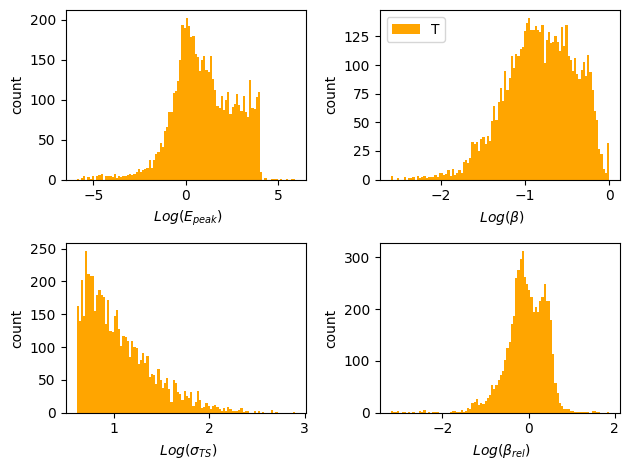

In [18]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=2)
ax0, ax1, ax2, ax3 = axes.flatten()

#colors = ['red', 'tan', 'lime']
ax0.hist(X_bal_log_Rel_data[:,[0]], 100, color='orange')
#ax0.hist(DM_log_bal_Rel[:,[0]], 100, color='m')
#ax0.hist(unids_log[:,[0]], 100, color='red')
#ax0.legend(prop={'size': 10})
#ax0.set_title('Epeak distribution')
ax0.set_xlabel(r' $Log(E_{peak})$')
ax0.set_ylabel('count')

ax1.hist(X_bal_log_Rel_data[:,[1]], 100, color='orange')
#ax1.hist(DM_log_bal_Rel[:,[1]], 100, color='m')
#ax1.hist(unids_log[:,[1]], 100,color='red')
ax1.legend(('TOT: Astro+DM'))
#ax1.set_title('Beta distribution')
ax1.set_xlabel(r' $Log(\beta)$')
ax1.set_ylabel('count')

ax2.hist(X_bal_log_Rel_data[:,[2]], 100, color='orange')
#ax2.hist(DM_log_bal_Rel[:,[2]], 100, color='m')
#ax2.hist(unids_log[:,[2]], 100, color='red')
#ax2.set_title('sigma distribution')
ax2.set_xlabel(r' $Log(\sigma_{TS})$')
ax2.set_ylabel('count')


ax3.hist(X_bal_log_Rel_data[:,[3]], 100, color='orange')
#ax3.hist(DM_log_bal_Rel[:,[3]], 100, color='m')
#ax3.hist(unids_log[:,[3]], 100, color='red')
#ax3.set_title('beta_err distribution')
ax3.set_xlabel(r' $Log(\beta_{rel})$')
ax3.set_ylabel('count')



fig.tight_layout()
plt.show()

#fig.savefig("histo_tot_data_bal.pdf", bbox_inches='tight')

In [19]:
print('sigma max',10**X_bal_log_Rel_data[:,2].max())
print('sigma min',10**X_bal_log_Rel_data[:,2].min())
print('log sigma max',X_bal_log_Rel_data[:,2].max())
print('log sigma min',X_bal_log_Rel_data[:,2].min())
np.log10(100)

sigma max 792.6913000000003
sigma min 4.056
log sigma max 2.89910409172093
log sigma min 0.6080979463252796


np.float64(2.0)

In [20]:
NDM_sample=0

for i in range(0,len(Y)):
       if Y[i]==1: 
        NDM_sample=NDM_sample+1

print (NDM_sample)

Nastro_sample=0

for i in range(0,len(Y)):
       if Y[i]==0: 
        Nastro_sample=Nastro_sample+1
        
print (Nastro_sample)        

2831
2831


In [21]:

X_log=X_bal_log_Rel_data

#normalizer = sklearn.preprocessing.StandardScaler()
#normalizer.fit(X_log)
#print('StandardSaler mean', normalizer.mean_)
#X_log = normalizer.transform(X_log)

#X_log = np.log10(X_log)

print(X_log.shape)
print(X_log[1:5,0])
print(X_log[1:5,1])


print(Y.shape)

(5662, 4)
[0.70814035 0.22474019 0.25731851 0.32611046]
[-1.73752546e-04 -5.81201709e-01 -5.61932550e-01 -1.10017950e+00]
(5662,)


In [22]:

unids_3F = np.genfromtxt('unids_3F_beta_err_names.txt',dtype='str') 
unids_3F_data = np.asarray(unids_3F[1::,:],dtype=float)

print(unids_3F[0,:])

unids_log=np.log10(unids_3F_data[:,[0,1,2,3]])
print(unids_log.shape)

['E_peak' 'beta' 'sigma_det' 'beta_Rel' 'number']
(1125, 4)


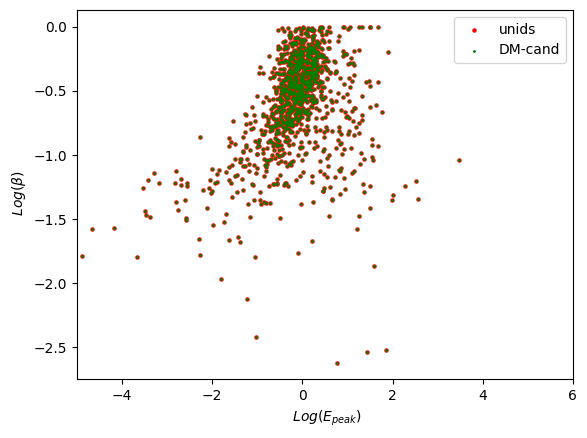

In [23]:
import matplotlib.pyplot as plt

f = plt.figure()
plt.scatter(unids_log[:,0],unids_log[:,1], color='red',label='unids',s=5)
plt.scatter(np.log10(unids_3F_data[:,0]),np.log10(unids_3F_data[:,1]), 
          color='green',label='DM-cand',s=1)
#plt.errorbar(selected_unIDs_80[:,0], selected_unIDs_80[:,1], yerr=selected_unIDs_80[:,3], fmt="o")

plt.ylabel(r' $Log(\beta)$')
plt.xlabel(r' $Log(E_{peak})$')
plt.xlim(-5,6)

plt.legend()
plt.show()

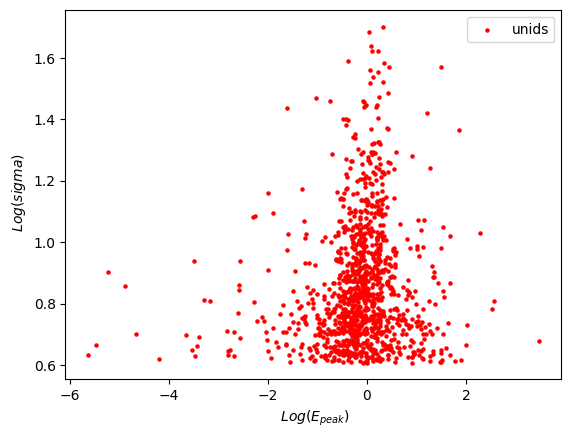

In [24]:
import matplotlib.pyplot as plt

f = plt.figure()
plt.scatter(unids_log[:,0],unids_log[:,2], color='red',label='unids',s=5)
#plt.scatter(np.log10(unids_3F_data[:,0]),np.log10(unids_3F_data[:,1]), 
         # color='green',label='DM-cand',s=1)
#plt.errorbar(selected_unIDs_80[:,0], selected_unIDs_80[:,1], yerr=selected_unIDs_80[:,3], fmt="o")

plt.ylabel(r' $Log(sigma)$')
plt.xlabel(r' $Log(E_{peak})$')
#plt.xlim(-5,6)

plt.legend()
plt.show()

# ANN

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [26]:

### n_activation_cells = np.arange(1, 100, 100//20)
#hidden_layers = (n_activation_cells, n_activation_cells)
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

#classifier = MLPClassifier(solver='adam', alpha=0.0, batch_size=120, 
#hidden_layer_sizes=(11, 1), learning_rate_init=0.015, max_iter=1000, random_state=0, activation='relu')

N_cells = np.arange(1, 110, 10)
hidden_layers_1 = [ (n_cells,)  for n_cells in N_cells  ]
hidden_layers_2 = [ (n_cells, n_cells)  for n_cells in N_cells  ]
#hidden_layers_3 = [ (n_cells, n_cells, n_cells)  for n_cells in N_cells  ]
#hidden_layers_4 = [ (n_cells, n_cells, n_cells, n_cells)  for n_cells in N_cells  ]

params = [{'model__hidden_layer_sizes': hidden_layers_1},
         {'model__hidden_layer_sizes': hidden_layers_2},
         #{'model__hidden_layer_sizes': hidden_layers_3},
         #{'model__hidden_layer_sizes': hidden_layers_4},
         ]

steps = [ ('scaler', StandardScaler()),
         ('model', MLPClassifier(solver='adam', alpha=0.0, batch_size=120, hidden_layer_sizes=params, learning_rate_init=0.015, max_iter=1000, random_state=None, activation='relu') ) ] #1e-4 es la default así que no cambia nada

pipe = Pipeline(steps)



In [27]:

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

normalizer = sklearn.preprocessing.StandardScaler()

N_splits=5 #25% of testing set with N_splits=4, but we lost the easy 5 statitics in each bin
N_Repeats=1
#N_sample=N_splits*N_Repeats

OA=[]
TN=[]
TP=[]
#unIDs_std_proba_check_repeated_rs_stats_all=np.array((1,))

#OA_rs_stats=open("OA_rs_stats.txt", "w")
#OA_rs_stats.write('seed_value OA \n') 
#TN_rs_stats=open("TN_rs_stats.txt", "w")
#TN_rs_stats.write('seed_value TN \n') 
#TP_rs_stats=open("TP_rs_stats.txt", "w")
#TP_rs_stats.write('seed_value TP \n') 

unids_DM_std_proba_check_repeated_kfold_rskf_4F_21=open("unids_DM_std_proba_check_repeated_kfold_rskf_4F_21.txt", "w")
unids_DM_std_proba_check_repeated_kfold_rskf_4F_21.write('Numb unids_DM_proba_check_repeated_kfold \n') 



rskf = RepeatedStratifiedKFold(n_splits=N_splits, n_repeats=N_Repeats)
rskf.get_n_splits(X_log, Y)
print('rskf',rskf)
ANN = MLPClassifier(solver='adam', alpha=0.0, batch_size=120, hidden_layer_sizes=(21,), 
                 learning_rate_init=0.015, max_iter=1000, random_state=None, activation='relu')
    
for train_index, test_index in rskf.split(X_log, Y):
        print('train_index',train_index.shape, "test_index", test_index.shape)
        X_train_split, X_test_split = X_log[train_index], X_log[test_index]
        Y_train_split, Y_test_split = Y[train_index], Y[test_index]
        normalizer.fit(X_train_split)
        X_train_split_std=normalizer.transform(X_train_split)
        X_test_split_std=normalizer.transform(X_test_split)
    
        ANN_fit=ANN.fit(X_train_split_std, Y_train_split)
        Y_test_split_01_std_check=ANN_fit.predict(X_test_split_std)
        Y_test_split_proba_std_check=ANN_fit.predict_proba(X_test_split_std)
        
        OA.extend([accuracy_score(Y_test_split, Y_test_split_01_std_check)])
        conf_matrix=sklearn.metrics.confusion_matrix(Y_test_split, Y_test_split_01_std_check, normalize='true')
        TN.extend([conf_matrix[0,0]])
        TP.extend([conf_matrix[1,1]])
        
        
           
        unids_std_check=normalizer.transform(unids_log)
        unIDs_std_proba_check_repeated_kfold=ANN_fit.predict_proba(unids_std_check)
        
        for i in range(0,len(unids_std_check)):
                #unIDs_std_proba_check_repeated_rs_stats_all[i]=np.append(ANN_fit.predict_proba(unids_std_check)[i,1])
                unids_DM_std_proba_check_repeated_kfold_rskf_4F_21.write('{} {} \n'.format(i, 
                                                                    unIDs_std_proba_check_repeated_kfold[i,1]))
   

       # OA_rs_stats.write('{} {} \n'.format(seed_value[j], OA[j]))
        #TN_rs_stats.write('{} {} \n'.format(seed_value[j], TN[j]))
        #TP_rs_stats.write('{} {} \n'.format(seed_value[j], TP[j]))  

    
unids_DM_std_proba_check_repeated_kfold_rskf_4F_21.close()

#OA_rs_stats.close()
#TN_rs_stats.close()
#TP_rs_stats.close()


print('X_train_split.shape', X_train_split.shape)
print('X_test_split.shape', X_test_split.shape)

#unIDs_std_proba_check_repeated_rs_stats=np.array(unIDs_std_proba_check_repeated_rs_stats)
#print('unIDs_std_proba_check_repeated_rs_stats.shape',unIDs_std_proba_check_repeated_rs_stats.shape)
#print(unIDs_std_proba_check_repeated_rs_stats[0:3,:])

OA=np.array(OA)
#OA=np.reshape(OA,(len(unids_std_check),(N_sample)))
TN=np.array(TN)
#TN=np.reshape(TN,(len(unids_std_check),(N_sample)))
TP=np.array(TP)
#TP=np.reshape(TP,(len(unids_std_check),(N_sample)))



rskf RepeatedStratifiedKFold(n_repeats=1, n_splits=5, random_state=None)
train_index (4529,) test_index (1133,)
train_index (4529,) test_index (1133,)
train_index (4530,) test_index (1132,)
train_index (4530,) test_index (1132,)
train_index (4530,) test_index (1132,)
X_train_split.shape (4530, 4)
X_test_split.shape (1132, 4)


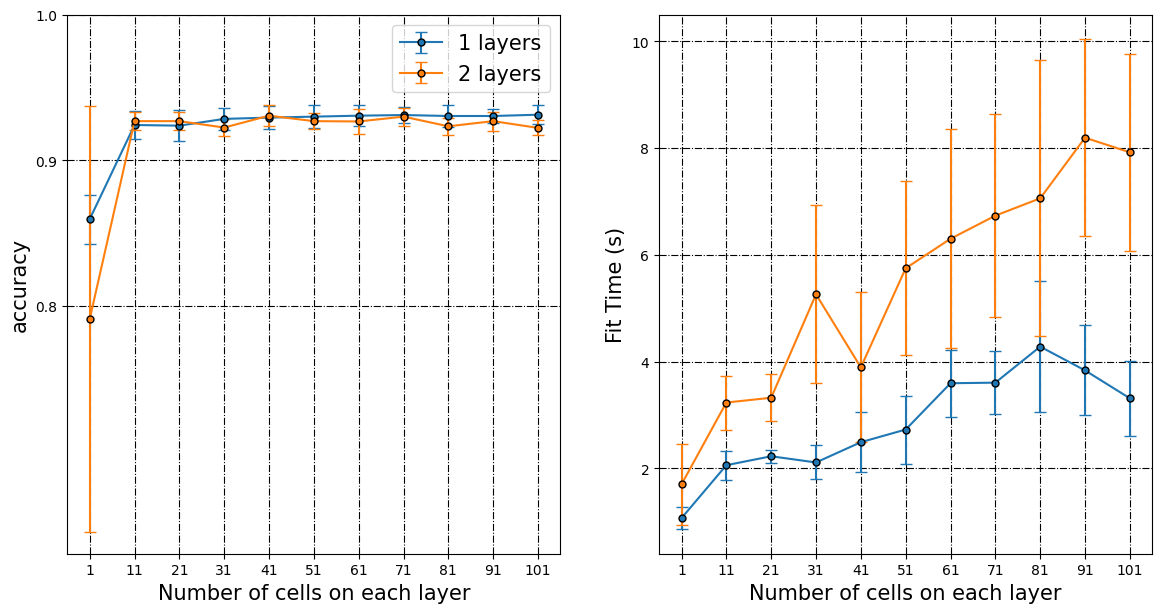

In [28]:
# %matplotlib widget
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold

fig, axs = plt.subplots(1, 2, figsize=(14, 7), sharex=True)
#fig.suptitle('ANN Best Hyper-parameters (2Features & 2Classes)', fontsize=16)

best_score = 0
for i, param in enumerate(params):
    #params = {'model__hidden_layer_sizes': (N_cells,)}
    search = GridSearchCV(pipe, param, scoring='accuracy', n_jobs=-1, 
                          cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=0)).fit(X_train_split, Y_train_split)
    
    grid_results = pd.DataFrame( search.cv_results_ )
    
    
    # MAKE THE PLOT
    axs[0].errorbar(N_cells, grid_results['mean_test_score'], yerr=grid_results['std_test_score'], 
                  fmt='-o', ms=5, mec='k', capsize=4, label= str(i+1)+' layers' )
    axs[0].set_xlabel('Number of cells on each layer', fontsize=15)
    axs[0].set_ylabel('accuracy', fontsize=15)
    axs[0].grid(linestyle='-.', color='k')
    
    axs[1].errorbar(N_cells, grid_results['mean_fit_time'], yerr=grid_results['std_fit_time'],
                   fmt='-o', ms=5, mec='k', capsize=4 )
    
    axs[0].set_xticks(np.arange(1, 110, step=10))
    axs[0].set_yticks(np.arange(0.8, 1.01, step=0.1))
    axs[1].set_xlabel('Number of cells on each layer', fontsize=15)
    axs[1].set_ylabel('Fit Time (s)', fontsize=15)
    axs[1].grid(linestyle='-.', color='k')
    axs[0].legend(fontsize=15)
    
    #print(search.cv_results_ )

In [29]:
import math

x_min, x_max = -6.5, 6.5 #Log[Epeak]
y_min, y_max = -7.5, 0.5 #Log[Beta] (including truncated sample values, i.e. bmin-bmin_err>0.0)
z_min, z_max = 0.0, 2.89 #Log[sigma_det] (including unids_min y sigma_det max ORIGINAL sample= TRUNCATED)
#k_min, k_max = -7.5, 0.5
k_min, k_max = X_log[:, 3].min(), X_log[:, 3].max()

print(x_min,x_max,y_min,y_max,z_min,z_max,k_min,k_max)

hx=0.1
hy=0.1  # step size in the mesh
hz=0.1
hk=0.1


xx, yy, zz, kk= np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy),np.arange(z_min, z_max, hz),np.arange(k_min, k_max, hk))



#xx, yy, zz, kk= np.meshgrid(np.linspace(x_min, x_max, 100, endpoint=True), np.linspace(y_min, y_max, 120, endpoint=True),np.linspace(z_min, z_max, 100, endpoint=True),np.linspace(k_min, k_max, 100, endpoint=True))

Z_classifier_sample= ANN_fit.predict_proba(np.c_[xx.ravel(), yy.ravel(),zz.ravel(), kk.ravel()])

print(Z_classifier_sample.shape)
print(Z_classifier_sample[0:5])
#print(Z_liblin[1267728-5:1267728])
print(xx.shape)
print(yy.shape)
#print(zz[1,:].shape)
#print(xx[:,0:5])
print('xsize',np.arange(x_min, x_max, hx).shape)
print('ysize',np.arange(y_min, y_max, hy).shape)
#print('zsize',np.arange(z_min, z_max, hz).shape)
print(xx.shape)
#print(yy[:,:,0].shape)

-6.5 6.5 -7.5 0.5 0.0 2.89 -3.1986570869544226 1.8669662999160774
(15381600, 2)
[[1.00000000e+00 1.64245655e-86]
 [1.00000000e+00 6.15338545e-87]
 [1.00000000e+00 2.30533663e-87]
 [1.00000000e+00 8.63683421e-88]
 [1.00000000e+00 3.23574892e-88]]
(80, 130, 29, 51)
(80, 130, 29, 51)
xsize (130,)
ysize (80,)
(80, 130, 29, 51)


In [30]:
Y_test_color=np.asarray(Y_test_split[:],dtype='str')

print(len(Y_test_split))
print(Y_test_color.shape)

for i in range(0,len(Y_test_split)):
    if Y_test_split[i]==1:
        Y_test_color[i]='k'
    elif Y_test_split[i]==0:
         Y_test_color[i]='w'
            

print(Y_test_color) 

1132
(1132,)
['w' 'w' 'w' ... 'k' 'k' 'k']


(15381600, 2)


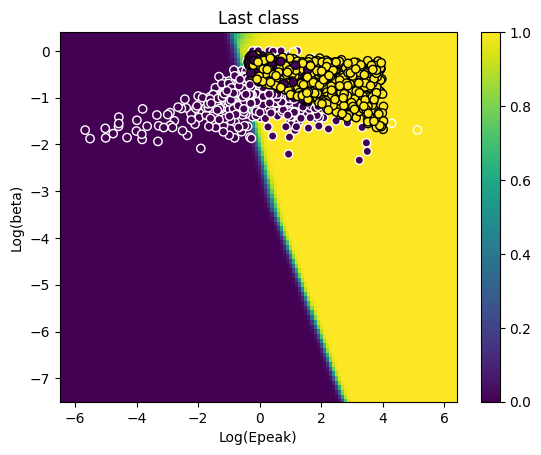

In [31]:
# Put the result into a color plot
#Z_liblin = Z_liblin.reshape((xx.shape, yy.shape))
Z_classifier_sample_1 = Z_classifier_sample[:,1].reshape(yy.shape)
print(Z_classifier_sample.shape)
#f=plt.figure(1, figsize=(4, 3))
f=plt.figure()
plt.pcolormesh(xx[:,:,0,0], yy[:,:,0,0], Z_classifier_sample_1[:,:,0,0])
#plt.colorbar()
#plt.pcolormesh(xx, yy, Z_classifier_0, cmap=plt.cm.PiYG)

# Plot also the training points

Y_test_split_proba_std_check

test=plt.scatter(X_test_split[:, 0],X_test_split[:, 1], c=Y_test_split_01_std_check[:], edgecolors=Y_test_color[:])
#train=plt.scatter(X_train_split[:, 0],X_test[:, 1], c=Y_test_classifier[:,1], edgecolors='k')
#unids=plt.scatter(unids_cut[:, 2], unids_cut[:, 0], c=Y_unids_liblin, edgecolors='m', cmap=plt.cm.Paired)
#test=plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test_fit_liblin, edgecolors='c', cmap=plt.cm.Paired)

#plt.yscale('log',basey=10) 
#plt.xscale('log',basex=10) 
plt.title('Last class')
plt.ylabel('Log(beta)')
plt.xlabel('Log(Epeak)')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
#plt.ylim(zz.min(), zz.max()+1000)
#plt.legend((test, ), ('test',))


#plt.legend((train, test, unids),
 #          ('train', 'test', 'unids'),
  #         scatterpoints=1,
   #        loc='lower left',
    #       ncol=3,
     #      fontsize=8)
#plt.show()

#plt.imshow(Z_classifier_sample_1[:,:,0,0],aspect='auto')
plt.colorbar()
plt.clim(0.0,1.0);


#f.savefig("NN_proba_4F_bal.pdf", bbox_inches='tight')
#f.savefig("plot/test_Fit11_prob_class_E_beta.jpg", format='jpg',bbox_inches='tight', dpi=100, quality=100)

(15381600, 2)


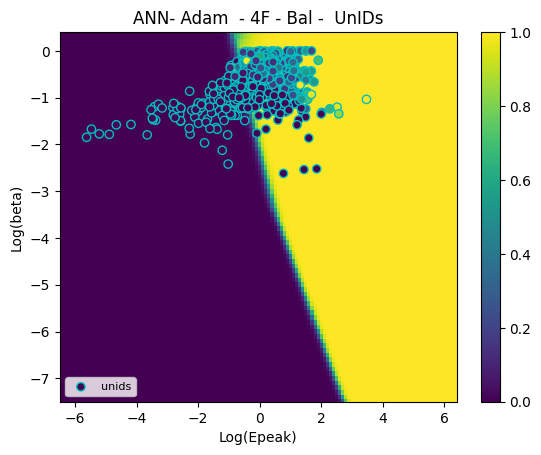

In [32]:
#Put the result into a color plot
#Z_liblin = Z_liblin.reshape((xx.shape, yy.shape))
Z_classifier_sample_1 = Z_classifier_sample[:,1].reshape(yy.shape)
print(Z_classifier_sample.shape)
#f=plt.figure(1, figsize=(4, 3))
f=plt.figure()
plt.pcolormesh(xx[:,:,0,0], yy[:,:,0,0], Z_classifier_sample_1[:,:,0,0])
plt.colorbar()
plt.clim(0.0,1.0);
#plt.pcolormesh(xx, yy, Z_classifier_0, cmap=plt.cm.PiYG)

# Plot also the training points


#test=plt.scatter(X_test_split[:, 0],X_test_split[:, 1], c=Y_test_split_proba_std_check[:,1], edgecolors=Y_test_color[:])

#test=plt.scatter(X_test[:, 0],X_test[:, 1], c=Y_test, edgecolors='k', cmap=plt.cm.PiYG)
#test=plt.scatter(X_test[:, 0],X_test[:, 1], c=Y_test_classifier[:,1], edgecolors='k')
unids=plt.scatter(unids_log[:, 0], unids_log[:, 1], c=unIDs_std_proba_check_repeated_kfold[:,1], edgecolors='c')
#test=plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test_fit_liblin, edgecolors='c', cmap=plt.cm.Paired)

#plt.yscale('log',basey=10) 
#plt.xscale('log',basex=10) 
plt.title('ANN- Adam  - 4F - Bal -  UnIDs')
plt.ylabel('Log(beta)')
plt.xlabel('Log(Epeak)')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
#plt.ylim(zz.min(), zz.max()+1000)
#plt.legend('train')


plt.legend((unids,),
          ('unids',),
          scatterpoints=1,
           loc='lower left',
           ncol=3,
          fontsize=8)
plt.show()

#plt.imshow(Z_classifier_sample_1[:,:,0,0],aspect='auto')



#f.savefig("NN_4F_BAL_unIDs.pdf", bbox_inches='tight')
#f.savefig("plot/test_Fit11_prob_class_E_beta.jpg", format='jpg',bbox_inches='tight', dpi=100, quality=100)

In [33]:
print(OA.shape)
#print(OA)
print('OA mean', OA.mean(), 'OA std',OA.std(ddof=1))
print('TN mean', TN.mean(), 'TN std',TN.std(ddof=1))
print('TP mean', TP.mean(), 'TP std',TP.std(ddof=1))
print(unIDs_std_proba_check_repeated_kfold.shape)

(5,)
OA mean 0.9316488324876262 OA std 0.004410633700886153
TN mean 0.9466636752855834 TN std 0.009615463011027397
TP mean 0.916636441253638 TP std 0.0084270235664975
(1125, 2)


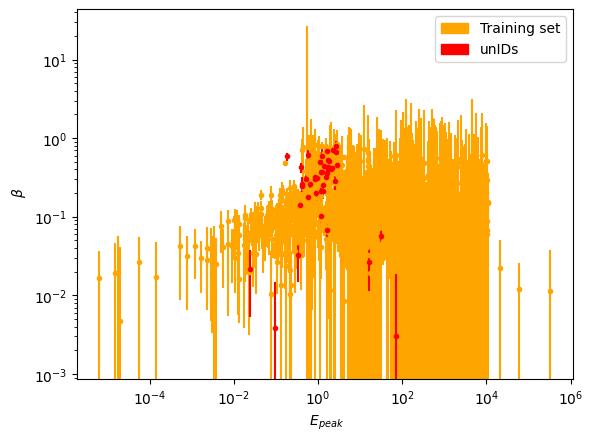

In [34]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


f = plt.figure()

for j in range(0,len(X_train_split_std)):
        if 10**X_train_split[j,2]>=20:      
            plt.errorbar(10**X_train_split[j,0],10**X_train_split[j,1], yerr=10**X_train_split[j,3]*10**X_train_split[j,1], fmt=".", color='orange',label='X_train_split')

for i in range(0,len(unids_log)):
    if 10**unids_log[i,2]>=20:
            plt.errorbar(10**unids_log[i,0],10**unids_log[i,1], yerr=10**unids_log[i,3]*10**unids_log[i,1], fmt=".", color='red',label='unIDs')    

#plt.errorbar(10**unids_std_check[i,0],10**unids_std_check[i,1], yerr=10**unids_std_check[i,3]*10**unids_std_check[i,1], fmt=".", color='red')
        
        #and X_train_split_std[j,2]>=50: 
#plt.scatter(10**unids_log[:,0],10**unids_log[:,1], color='red',label='unids log',s=5)
#plt.errorbar(10**unids_log[:,0],10**unids_log[:,1], yerr=10**unids_log[:,3]*10**unids_log[:,1],
            # fmt=".", color='red',label='unIDs')
#plt.scatter(np.log10(unids_3F_data[:,0]),np.log10(unids_3F_data[:,1]), 
 #         color='green',label='unids lin data',s=1)
#plt.errorbar(10**X_train_split_std[:,0],10**X_train_split_std[:,1], yerr=10**X_train_split_std[:,3]*10**X_train_split_std[:,1],
            # fmt=".", color='orange',label='X_train_split')     
           
#plt.scatter(unids_std_check[:,0],unids_std_check[:,1],
        #  color='blue',label='unids norm',s=1)
  # yerr=10**unids_log[index_selected[i],3]*10**unids_log[index_selected[i],1]
          # plt.scatter(10**X_train_split_std[j,0],10**X_train_split_std[j,1], color='orange',label='X_train_split',s=1)
#plt.errorbar(selected_unIDs_80[:,0], selected_unIDs_80[:,1], yerr=selected_unIDs_80[:,3], fmt="o")

plt.ylabel(r' $\beta$')
plt.xlabel(r' $E_{peak}$')
plt.yscale('log',base=10) 
plt.xscale('log',base=10) 

orange_patch = mpatches.Patch(color='orange', label='Training set')
red_patch = mpatches.Patch(color='red', label='unIDs')
plt.legend(handles=[orange_patch,red_patch])

#plt.legend()
plt.show()


#fig.savefig("Trainig_unIDs_errors_sigma20.pdf", bbox_inches='tight')

In [35]:
from matplotlib.patches import Patch

cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm

def plot_cv_indices(cv, X, y, group, ax, n_splits, lw=10):
    """Create a sample plot for indices of a cross-validation object."""

    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y, groups=group)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(
            range(len(indices)),
            [ii + 0.5] * len(indices),
            c=indices,
            marker="_",
            lw=lw,
            cmap=cmap_cv,
            vmin=-0.2,
            vmax=1.2,
        )

    # Plot the data classes and groups at the end
    ax.scatter(
        range(len(X)), [ii + 1.5] * len(X), c=y, marker="_", lw=lw, cmap=cmap_data
    )

    ax.scatter(
        range(len(X)), [ii + 2.5] * len(X), c=group, marker="_", lw=lw, cmap=cmap_data
    )

    # Formatting
    yticklabels = list(range(n_splits)) + ["class", "group"]
    ax.set(
        yticks=np.arange(n_splits + 2) + 0.5,
        yticklabels=yticklabels,
        xlabel="Sample index",
        ylabel="CV iteration",
        ylim=[n_splits + 2.2, -0.5],
        xlim=[0, len(X_log)],
    )
    ax.set_title("{}".format(type(cv).__name__), fontsize=15)
    return ax

/Users/martacaninoromero/DarkMatter_ML_TFG/.venv/lib/python3.9/site-packages/sklearn/model_selection/_split.py:86: UserWarning: The groups parameter is ignored by RepeatedStratifiedKFold
  warnings.warn(
/Users/martacaninoromero/DarkMatter_ML_TFG/.venv/lib/python3.9/site-packages/sklearn/model_selection/_split.py:877: UserWarning: The groups parameter is ignored by StratifiedKFold
  warnings.warn(


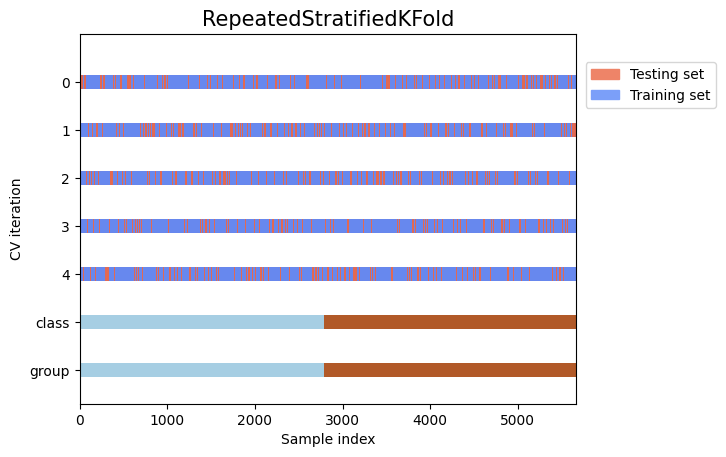

In [36]:
fig, ax = plt.subplots()
cv = rskf
plot_cv_indices(cv, X_log , Y, Y ,ax, N_splits*N_Repeats)
ax.axes
ax.legend(
        [Patch(color=cmap_cv(0.8)), Patch(color=cmap_cv(0.2))],
        ["Testing set", "Training set"],
        loc=(1.02, 0.8),
    )

#fig.savefig("Reapeated5_Kfold5_split.pdf", bbox_inches='tight')

# unIDs classification with errors

In [37]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
import sklearn
import seaborn as sns

In [38]:

unids_3F = np.genfromtxt('unids_3F_beta_err_names.txt',dtype='str') 
unids_3F_data = np.asarray(unids_3F[1::,:],dtype=float)

print(unids_3F[0,:])

unids_log=np.log10(unids_3F_data[:,[0,1,2,3]])
print(unids_log.shape)

['E_peak' 'beta' 'sigma_det' 'beta_Rel' 'number']
(1125, 4)


In [39]:

unids_DM_std_proba_repeated_kfold= np.genfromtxt('unids_DM_std_proba_check_repeated_kfold_rskf_4F_21.txt',dtype='str') 
unids_DM_std_proba_data_repeated_kfold=np.asarray(unids_DM_std_proba_repeated_kfold[1::],dtype=float)
print(unids_DM_std_proba_data_repeated_kfold[0,:])
print(unids_DM_std_proba_data_repeated_kfold[1,:])

#N_splits=5
#N_Repeats=20

print('unids_DM_std_proba_data_repeated_kfold.shape',unids_DM_std_proba_data_repeated_kfold.shape)
print(unids_DM_std_proba_data_repeated_kfold[0,0:3])
print(unids_DM_std_proba_data_repeated_kfold[1,0:3])
print(unids_DM_std_proba_data_repeated_kfold[2,0:3])

[0.00000000e+00 5.96736788e-09]
[1.         0.41194304]
unids_DM_std_proba_data_repeated_kfold.shape (5625, 2)
[0.00000000e+00 5.96736788e-09]
[1.         0.41194304]
[2.        0.8035779]


In [40]:

#defining an array where each column is the probability to be DM for each unIDs in each split

import itertools 

N_unids=unids_log.shape[0]
print('N_unids',N_unids)

N_sample=N_splits*N_Repeats
print('N_sample',N_sample)

print(unids_DM_std_proba_data_repeated_kfold.shape)

unids_number=unids_DM_std_proba_data_repeated_kfold[0:N_unids,0]

print('unids number',unids_number)
print('unids number shape',unids_number.shape)

unids_DM_std_proba_N_sample_repeated_kfold=np.zeros((N_unids,(N_sample+1)))

unids_DM_std_proba_N_sample_repeated_kfold[:,0]=unids_number[:].astype(int)
unids_DM_std_proba_N_sample_repeated_kfold[:,1:(N_sample+1)]=np.reshape(
unids_DM_std_proba_data_repeated_kfold[:,1],(N_unids,(N_sample)))

print('unids_DM_std_proba_N_sample_repeated_kfold.shape', 
      unids_DM_std_proba_N_sample_repeated_kfold.shape)
print(unids_DM_std_proba_N_sample_repeated_kfold)

#unids_DM_std_proba_N_sample_repeated_kfold=np.array(unids_DM_std_proba_N_sample_repeated_kfold)

#unids_int_prob=float((unids_DM_std_proba_N_sample_repeated_kfold[:,1].T))
#print(unids_int_prob)

N_unids 1125
N_sample 5
(5625, 2)
unids number [0.000e+00 1.000e+00 2.000e+00 ... 1.122e+03 1.123e+03 1.124e+03]
unids number shape (1125,)
unids_DM_std_proba_N_sample_repeated_kfold.shape (1125, 6)
[[0.00000000e+00 5.96736788e-09 4.11943037e-01 8.03577905e-01
  2.85748044e-01 2.56779890e-01]
 [1.00000000e+00 2.23729139e-13 3.11975997e-14 7.35979055e-10
  1.48045525e-01 2.89649109e-04]
 [2.00000000e+00 5.31556781e-25 8.63914011e-33 2.95832487e-01
  4.72543649e-52 3.89120880e-01]
 ...
 [1.12200000e+03 1.57350084e-01 1.26271275e-08 3.18158936e-06
  3.49449625e-07 3.57754244e-01]
 [1.12300000e+03 1.38293163e-01 2.78771853e-29 1.27149746e-01
  7.96685449e-02 6.49867684e-04]
 [1.12400000e+03 9.86001043e-22 2.44317694e-01 1.29139849e-05
  1.88889864e-17 1.36514049e-01]]


In [ ]:

unids_mean=unids_DM_std_proba_N_sample_repeated_kfold[:,1:(N_sample+1)].mean(axis=1)
unids_std=unids_DM_std_proba_N_sample_repeated_kfold[:,1:(N_sample+1)].std(axis=1,ddof=1)
print('unids_mean', unids_mean, 'unids std',unids_std)
print(unids_mean.shape)
p_cut=0.90

unids_mean [0.35160978 0.02966703 0.13699067 ... 0.10302157 0.06915226 0.07616893] unids std [0.29363038 0.06617571 0.19045977 ... 0.15786064 0.06657586 0.11103906]
(1125,)


Text(0, 0.5, 'count')

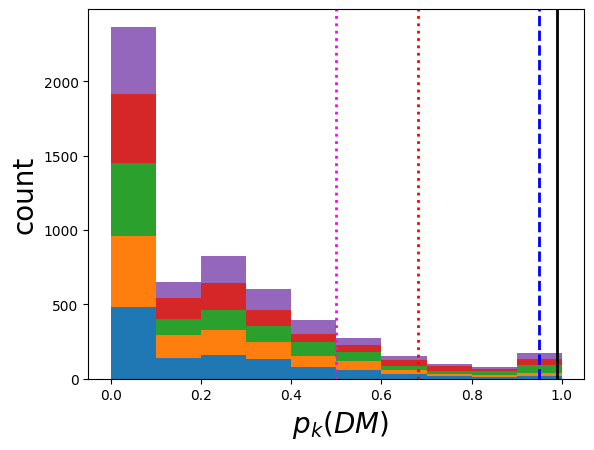

In [42]:
import matplotlib.pyplot as plt

bins=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

fig, axes = plt.subplots(nrows=1, ncols=1)
#ax0, ax1, ax2 = axes.flatten()

#for i in range(0,len(unids_DM_std_proba_N_sample_repeated_kfold)):
counts_all, bins_all, ignored = plt.hist(unids_DM_std_proba_N_sample_repeated_kfold[:,1:(N_sample+1)], bins,histtype='bar', stacked='True', density=False, label='all p hist')
plt.axvline(0.50, color='magenta', linestyle=':', linewidth=2)
plt.axvline(0.68, color='red', linestyle=':', linewidth=2)
plt.axvline(0.95, color='blue', linestyle='--', linewidth=2)
plt.axvline(0.99, color='black', linestyle='-', linewidth=2)
#plt.axvline(value_unID, color='k', linestyle='-', linewidth=1)
#plt.axvline(unids_std.all(), color='green', linestyle='-', linewidth=1)
#plt.axvline(unids_std.all(), color='green', linestyle='--', linewidth=1)

plt.xlabel(r' $p_k(DM)$',size=20)
plt.ylabel('count',size=20)


#fig.savefig("full_histo_4F.pdf", bbox_inches='tight')


In [43]:
all_color=np.asarray(unids_DM_std_proba_N_sample_repeated_kfold[:,1:(N_sample+1)],dtype='str')

print(all_color.shape)

for i in range(0,len(unids_DM_std_proba_N_sample_repeated_kfold[:,1:(N_sample+1)])):
    for j in range(0,N_sample):
        all_color[i,j]='midnightblue'

print(len(unids_log))    
print(all_color.shape)
print(all_color)

(1125, 5)
1125
(1125, 5)
[['midnightblue' 'midnightblue' 'midnightblue' 'midnightblue'
  'midnightblue']
 ['midnightblue' 'midnightblue' 'midnightblue' 'midnightblue'
  'midnightblue']
 ['midnightblue' 'midnightblue' 'midnightblue' 'midnightblue'
  'midnightblue']
 ...
 ['midnightblue' 'midnightblue' 'midnightblue' 'midnightblue'
  'midnightblue']
 ['midnightblue' 'midnightblue' 'midnightblue' 'midnightblue'
  'midnightblue']
 ['midnightblue' 'midnightblue' 'midnightblue' 'midnightblue'
  'midnightblue']]


Text(0.31622776601683794, 1, ' $NN, 4F$')

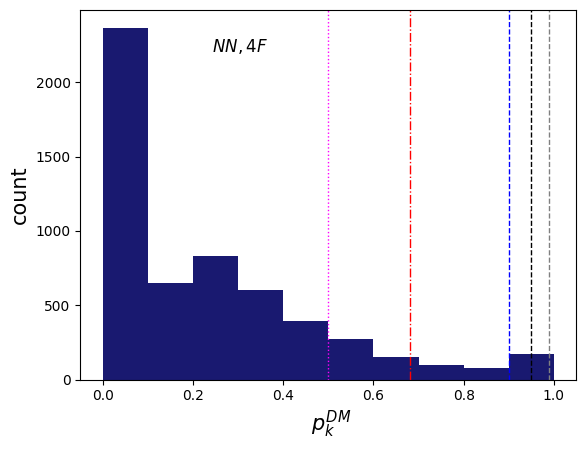

In [44]:
import matplotlib.pyplot as plt

bins=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

fig, axes = plt.subplots(nrows=1, ncols=1)
#ax0, ax1, ax2 = axes.flatten()

counts_all, bins_all, ignored = plt.hist(unids_DM_std_proba_N_sample_repeated_kfold[:,1:(N_sample+1)], 
                                         bins, histtype='barstacked',density=False, color=all_color[i,:])
plt.axvline(0.50, color='magenta', linestyle=':', linewidth=1)
plt.axvline(0.68, color='red', linestyle='-.', linewidth=1)
plt.axvline(0.90, color='blue', linestyle='--', linewidth=1)
plt.axvline(0.95, color='black', linestyle='--', linewidth=1)
plt.axvline(0.99, color='gray', linestyle='--', linewidth=1)
#plt.axvline(value_unID, color='k', linestyle='-', linewidth=1)
#plt.axvline(unids_std.all(), color='green', linestyle='-', linewidth=1)
#plt.axvline(unids_std.all(), color='green', linestyle='--', linewidth=1)

plt.xlabel(r' $p_k^{DM}$',size=15)
plt.ylabel('count',size=15)
plt.title(r' $NN, 4F$', y=10**(0), x=10**(-0.5), pad=-30)

#fig.savefig("full_histo_4F_single_count.pdf", bbox_inches='tight')
